In [2]:
from pose_format import Pose
from pose_format.pose_visualizer import PoseVisualizer
POSE_DIR_ISIGN = "/DATA7/vaibhav/isign/Data/iSign-poses_v1.1/"
HOW2SIGN_DIR = "/DATA7/sanjeet/ISL/WLASL/How2Sign/videos/How2Sign_pose_all/"
#/DATA3/vaibhav/isign/PretrainingISL/helpers/videos/plot_vid_frames/A2VCUgPweiU--204.mp4
#pose_file = POSE_DIR_ISIGN + "A2VCUgPweiU--204.pose"
pose_file = HOW2SIGN_DIR + "-g0iPSnQt6w_2.pose"
with open(pose_file, "rb") as f:
    pose = Pose.read(f.read())

v = PoseVisualizer(pose)

v.save_video("example.mp4", v.draw())

0it [00:00, ?it/s]15:38:06 ::   WriteGear   :: WARNING  :: Optional `-disable_ffmpeg_window` flag is only available on Windows OS with `logging=False`. Discarding!
15:38:06 ::    Helper     ::  ERROR   :: FFmpeg validity Test Failed!
15:38:06 ::   WriteGear   :: WARNING  :: Disabling Compression Mode since no valid FFmpeg executable found on this machine!
15:38:06 ::   WriteGear   :: CRITICAL :: Compression Mode is disabled, Activating OpenCV built-in Writer!
OpenCV: FFMPEG: tag 0x47504a4d/'MJPG' is not supported with codec id 7 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
71it [00:03, 20.68it/s]


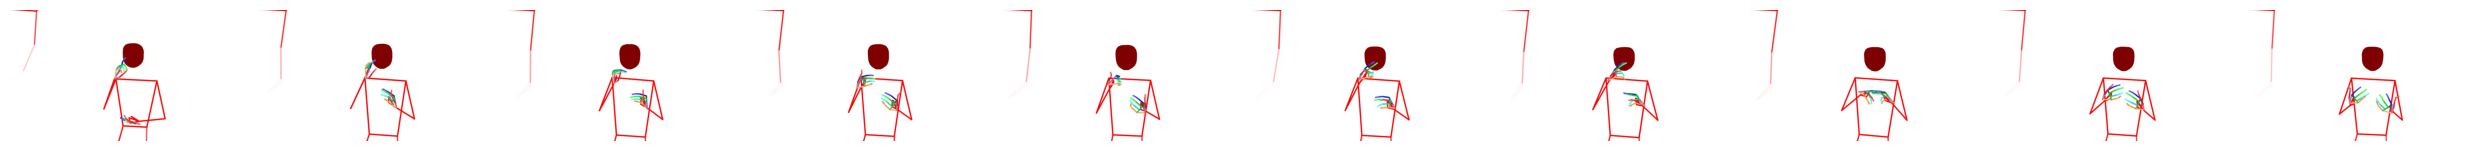

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def extract_frames(video_path, num_frames=10):
    # Read the video
    cap = cv2.VideoCapture(video_path)
    
    # Get total frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Calculate frame indices to extract
    frame_indices = np.linspace(0, total_frames-1, num_frames, dtype=int)
    
    frames = []
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        if frame_count in frame_indices:
            # Convert BGR to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame_rgb)
            
        frame_count += 1
        
    cap.release()
    return frames, frame_indices

# Example usage
#video_path = "/DATA3/vaibhav/isign/PretrainingISL/helpers/videos/plot_vid_frames/A2VCUgPweiU--204.mp4"
video_path = '/DATA3/vaibhav/isign/PretrainingISL/helpers/videos/plot_vid_frames/example.mp4'
frames, frame_indices = extract_frames(video_path, num_frames=10)

# Plot the frames in a grid
rows, cols = 1, 10  # Changed to 1 row, 10 columns
plt.figure(figsize=(25, 4))  # Adjusted figure size for better horizontal display

for idx, frame in enumerate(frames):
    cv2.imwrite(f'frame_{idx}.jpg', frame)
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(frame)
    #plt.title(f'Frame {frame_indices[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


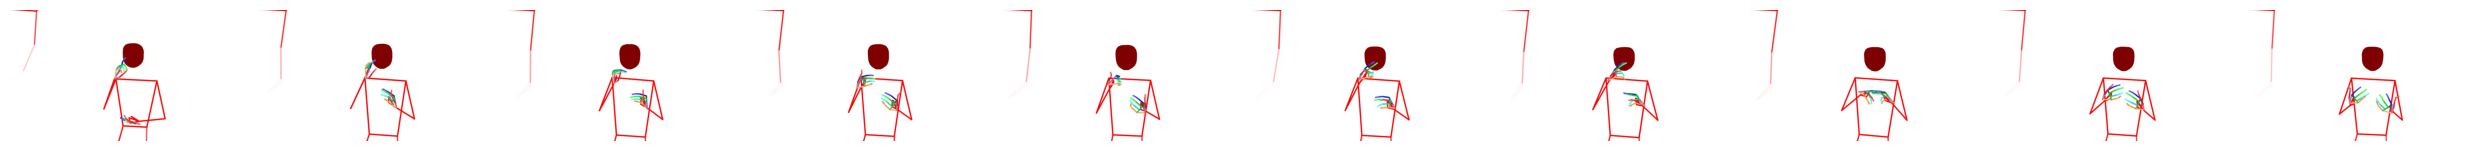

Successfully saved 10 frames to 'extracted_frames' directory


In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def extract_frames(video_path, num_frames=10):
    # Read the video
    cap = cv2.VideoCapture(video_path)
    
    # Get total frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Calculate frame indices to extract
    frame_indices = np.linspace(0, total_frames-1, num_frames, dtype=int)
    
    frames = []
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
            
        if frame_count in frame_indices:
            # Store the original BGR frame and RGB frame as tuple
            frames.append((frame, cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)))
            
        frame_count += 1
        
    cap.release()
    return frames, frame_indices

# Create output directory
output_dir = "extracted_frames"
os.makedirs(output_dir, exist_ok=True)

# Example usage
video_path = "/DATA3/vaibhav/isign/PretrainingISL/helpers/videos/plot_vid_frames/example.mp4"
frames, frame_indices = extract_frames(video_path, num_frames=10)

# Plot the frames in a grid
rows, cols = 1, 10  # Single row, 10 columns
plt.figure(figsize=(25, 4))  # Wide figure for horizontal display

for idx, (frame_bgr, frame_rgb) in enumerate(frames):
    # Save the BGR frame
    save_path = os.path.join(output_dir, f'frame_{frame_indices[idx]:04d}.jpg')
    save_path_bgr = os.path.join(output_dir, f'frame_bgr_{frame_indices[idx]:04d}.jpg')
    cv2.imwrite(save_path_bgr, frame_bgr)
    cv2.imwrite(save_path, frame_rgb)
    
    # Display the RGB frame
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(frame_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"Successfully saved {len(frames)} frames to '{output_dir}' directory")

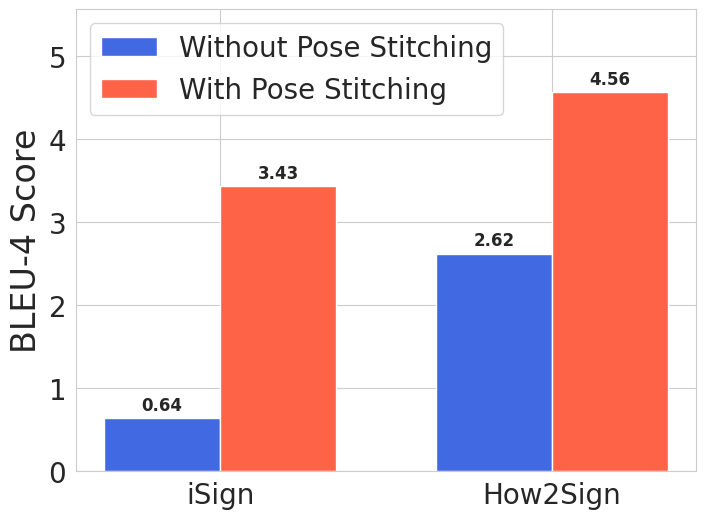

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
datasets = ["iSign", "How2Sign"]
bleu_before = [0.64, 2.62]
bleu_after = [3.43, 4.56]

# Bar width and positions
x = np.arange(len(datasets))
width = 0.35  

# Plot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

bars1 = plt.bar(x - width/2, bleu_before, width, label="Without Pose Stitching", color="royalblue")
bars2 = plt.bar(x + width/2, bleu_after, width, label="With Pose Stitching", color="tomato")

# Labels and title
#plt.xlabel("Datasets", fontsize=24)
plt.ylabel("BLEU-4 Score", fontsize=24)
#plt.title("BLEU-4 Score Before and After Pertaining", fontsize=20)
plt.xticks(x, datasets, fontsize=20)
plt.yticks(fontsize=20)  # Increase y-axis tick font size
plt.legend(fontsize=20)

# Annotate bars with values
for bar in bars1 + bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.2f}", ha='center', fontsize=12, fontweight='bold')

# Show plot
plt.ylim(0, max(bleu_after) + 1)  # Adjust y-axis for better visibility
plt.savefig('/DATA3/vaibhav/isign/PretrainingISL/helpers/plots/Before_after_PT.pdf')

plt.show()


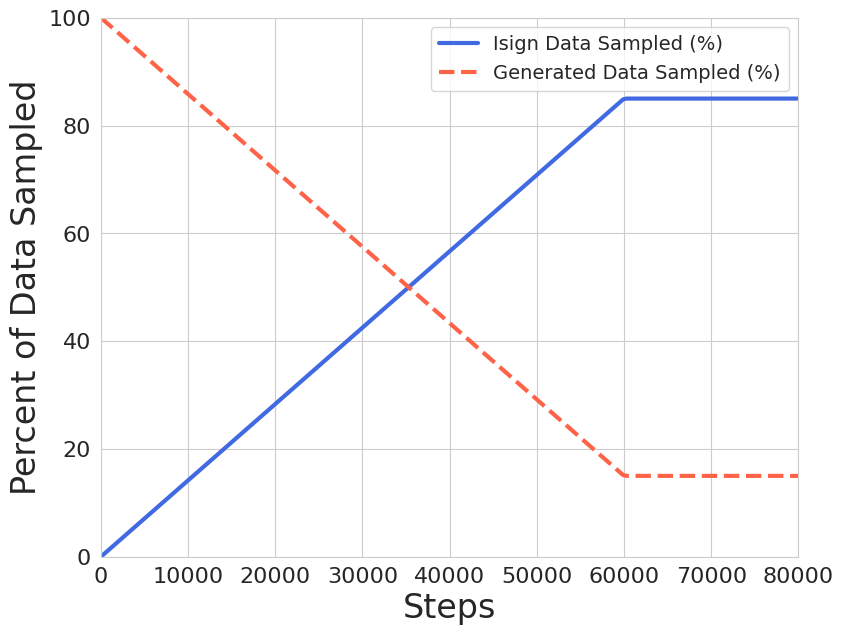

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define step range
steps = np.linspace(0, 80000, 200)  # 200 points for smooth plot

# Compute Isign data sampling (increasing linearly, then constant)
isign_percent = np.where(steps <= 60000, (steps / 60000) * 85, 85)  

# Compute complementary data sampling (decreasing linearly, then constant)
complementary_percent = np.where(steps <= 60000, 100 - (steps / 60000) * 85, 15)

# Set figure size and style
plt.figure(figsize=(9, 7))
sns.set_style("whitegrid")

# Plot both lines
plt.plot(steps, isign_percent, color="royalblue", linewidth=3, label="Isign Data Sampled (%)")
plt.plot(steps, complementary_percent, color="tomato", linewidth=3, linestyle="dashed", label="Generated Data Sampled (%)")

# Labels and title with larger font sizes
plt.xlabel("Steps", fontsize=24)
plt.ylabel("Percent of Data Sampled", fontsize=24)
#plt.title("Isign vs Generated Data Sampling Over Training Steps", fontsize=20)

# Increase tick sizes
plt.xticks(np.linspace(0, 80000, 9), fontsize=16)
plt.yticks(np.linspace(0, 100, 6), fontsize=16)

# Axes limits
plt.ylim(0, 100)  
plt.xlim(0, 80000)

# Increase legend size
plt.legend(fontsize=14)

# Save the figure as PDF
plt.savefig("isign_complementary_sampling.pdf", format="pdf", bbox_inches="tight")

# Show the plot
plt.show()


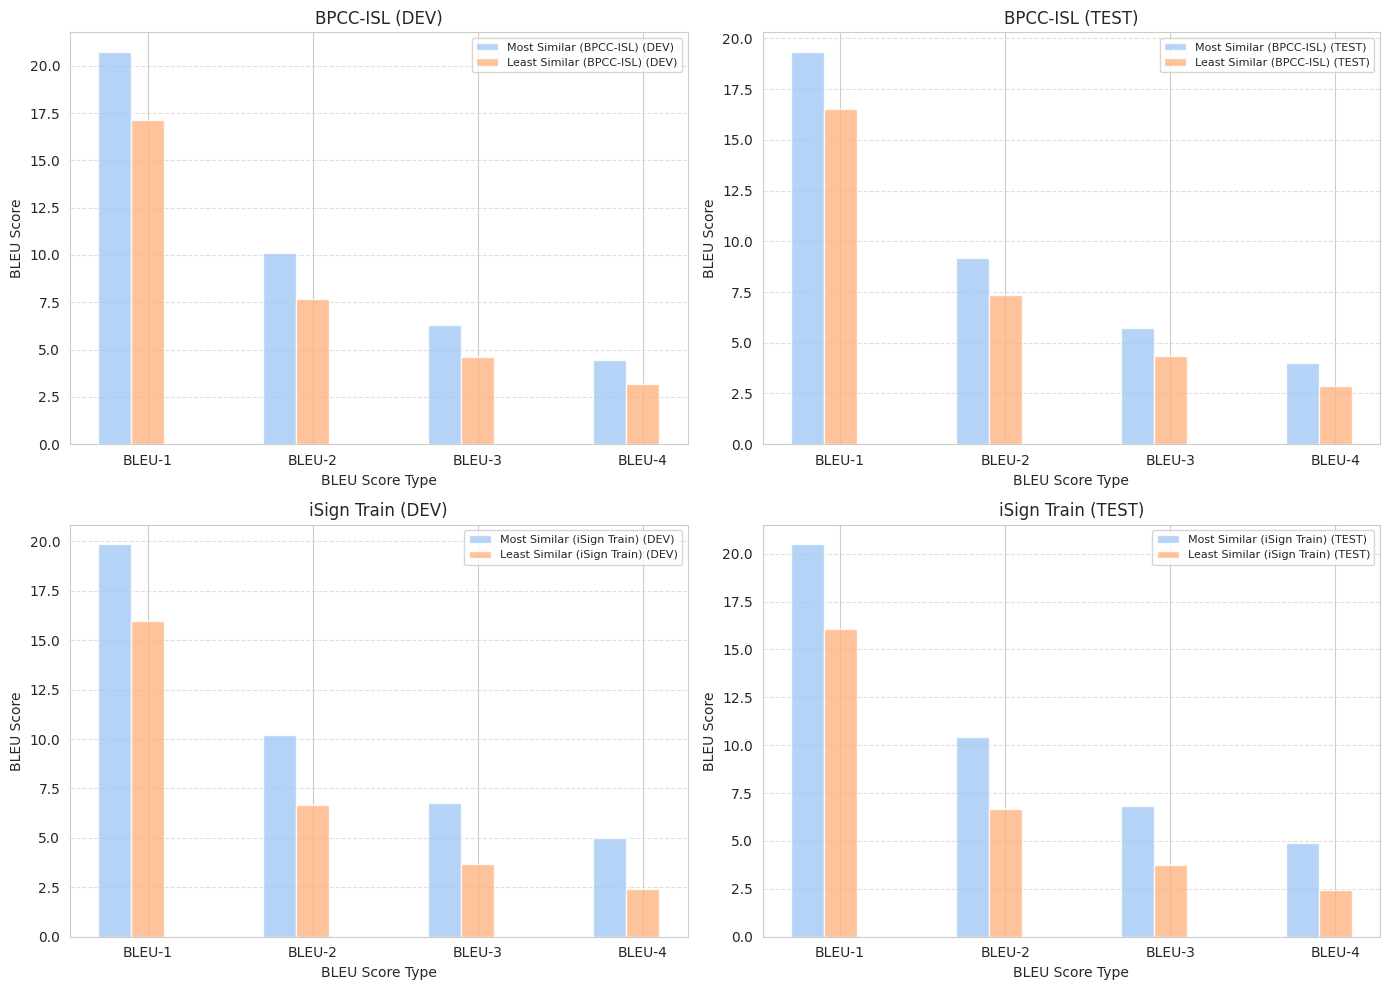

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data from the table
bpcc_methods = ["Most Similar (BPCC-ISL)", "Least Similar (BPCC-ISL)"]
isign_methods = ["Most Similar (iSign Train)", "Least Similar (iSign Train)"]

bleu_types = ["BLEU-1", "BLEU-2", "BLEU-3", "BLEU-4"]

dev_bpcc_scores = [
    [20.73, 10.08, 6.31, 4.43],  # Most Similar (BPCC-ISL)
    [17.12, 7.66, 4.61, 3.18]    # Least Similar (BPCC-ISL)
]
test_bpcc_scores = [
    [19.33, 9.20, 5.75, 4.00],   # Most Similar (BPCC-ISL)
    [16.51, 7.37, 4.33, 2.88]    # Least Similar (BPCC-ISL)
]

dev_isign_scores = [
    [19.84, 10.18, 6.74, 4.97],  # Most Similar (iSign Train)
    [15.97, 6.66, 3.69, 2.40]    # Least Similar (iSign Train)
]
test_isign_scores = [
    [20.48, 10.45, 6.82, 4.91],  # Most Similar (iSign Train)
    [16.08, 6.65, 3.74, 2.44]    # Least Similar (iSign Train)
]

def plot_bleu_scores(ax, methods, scores, title, dataset):
    bar_width = 0.4
    x = np.arange(len(bleu_types))  # Positions for BLEU types
    colors = sns.color_palette("pastel", len(methods))

    for i, (method, score) in enumerate(zip(methods, scores)):
        ax.bar(x + i * bar_width / len(methods), score, bar_width / 2, label=f"{method} ({dataset})", color=colors[i], alpha=0.8)
    
    ax.set_xlabel("BLEU Score Type")
    ax.set_ylabel("BLEU Score")
    ax.set_title(title)
    ax.set_xticks(x + bar_width / 2)
    ax.set_xticklabels(bleu_types)
    ax.legend(loc="upper right", fontsize=8)
    ax.grid(axis='y', linestyle='--', alpha=0.6)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_bleu_scores(axes[0, 0], bpcc_methods, dev_bpcc_scores, "BPCC-ISL (DEV)", "DEV")
plot_bleu_scores(axes[0, 1], bpcc_methods, test_bpcc_scores, "BPCC-ISL (TEST)", "TEST")
plot_bleu_scores(axes[1, 0], isign_methods, dev_isign_scores, "iSign Train (DEV)", "DEV")
plot_bleu_scores(axes[1, 1], isign_methods, test_isign_scores, "iSign Train (TEST)", "TEST")

plt.tight_layout()
plt.show()

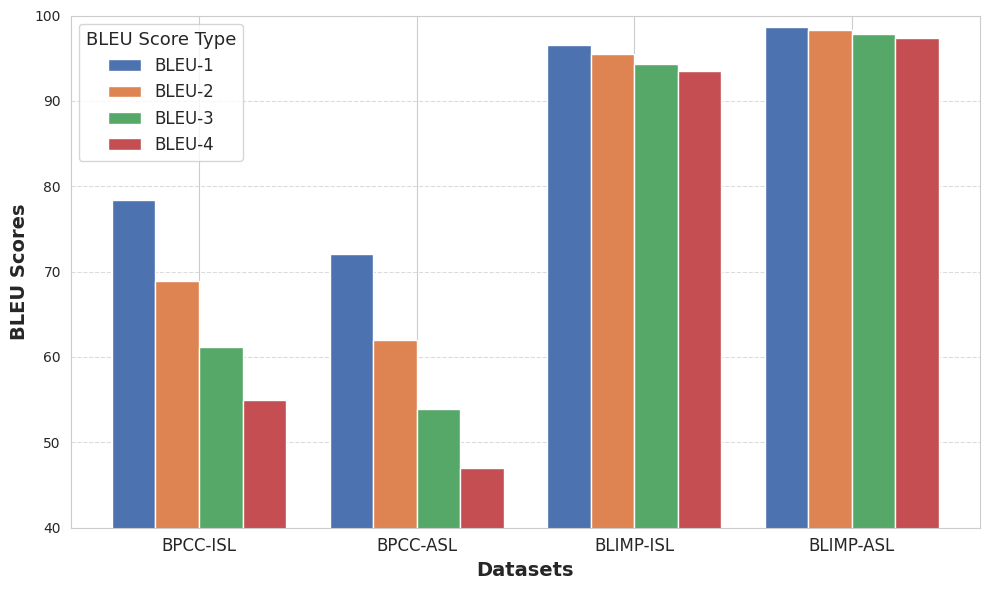

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for a professional look
sns.set_style("whitegrid")
sns.set_palette("muted")  # Conference-friendly colors

# BLEU scores from the table
models = ["BPCC-ISL", "BPCC-ASL", "BLIMP-ISL", "BLIMP-ASL"]
bleu_scores = {
    "BLEU-1": [78.44, 72.05, 96.53, 98.63],
    "BLEU-2": [68.86, 62.00, 95.53, 98.27],
    "BLEU-3": [61.13, 53.86, 94.32, 97.80],
    "BLEU-4": [54.97, 47.03, 93.46, 97.33],
}

# Define colors using a professional palette
colors = sns.color_palette("deep", 4)

# Bar settings
x = np.arange(len(models))  # Position of groups
width = 0.2  # Width of bars

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with appropriate colors
for i, (bleu_type, scores) in enumerate(bleu_scores.items()):
    ax.bar(x + i * width, scores, width, label=bleu_type, color=colors[i])

# Formatting
ax.set_xlabel("Datasets", fontsize=14, fontweight="bold")
ax.set_ylabel("BLEU Scores", fontsize=14, fontweight="bold")
#ax.set_title("Validation BLEU Scores", fontsize=16, fontweight="bold", pad=15)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models, fontsize=12)
ax.legend(title="BLEU Score Type", fontsize=12, title_fontsize=13)

# Improve aesthetics
plt.ylim(40, 100)  # Ensure a good visual range
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Light grid for readability
plt.tight_layout()

# Show plot
plt.show()


Chart saved as 'bleu4_scores.pdf'


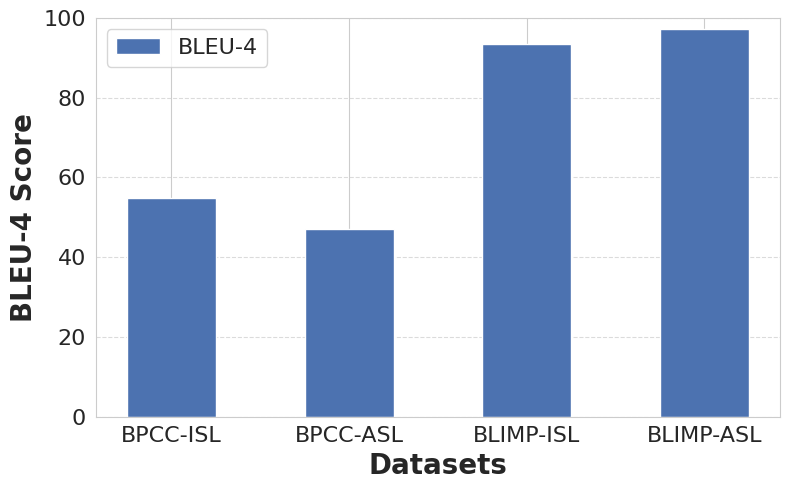

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for a professional look
sns.set_style("whitegrid")
sns.set_palette("muted")  # Conference-friendly colors

# BLEU-4 scores from the table
models = ["BPCC-ISL", "BPCC-ASL", "BLIMP-ISL", "BLIMP-ASL"]
bleu_4_scores = [54.97, 47.03, 93.46, 97.33]

# Define color using a single professional shade
color = sns.color_palette("deep")[0]  # Selecting a visually distinct color

# Create figure
fig, ax = plt.subplots(figsize=(8, 5))

# Plot bars
ax.bar(models, bleu_4_scores, color=color, width=0.5, label="BLEU-4")

# Formatting
ax.set_xlabel("Datasets", fontsize=20, fontweight="bold")
ax.set_ylabel("BLEU-4 Score", fontsize=20, fontweight="bold")
#ax.set_title("BLEU-4 Scores for Different Models", fontsize=16, fontweight="bold", pad=15)
ax.set_ylim(0, 100)  # Start from 0 for accurate comparison
ax.legend(fontsize=16)
# increase tick sizes
ax.tick_params(axis='both', which='major', labelsize=16)

# Improve aesthetics
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Light grid for readability
plt.tight_layout()

# Save as PDF
plt.savefig("bleu4_scores.pdf", format="pdf", bbox_inches="tight")

# Show success message
print("Chart saved as 'bleu4_scores.pdf'")
